In [1]:
def rasterize_triangle(tri):
    """
    Given a 3x2 numpy array TRI describing the integer vertices of a general
    triangle, return an array containing all the points that lie within this
    triangle or on the triangle's edge, but not the triangle vertices
    themselves.
    This code is based on the description given in
    http://www.sunshine2k.de/coding/java/TriangleRasterization/TriangleRasterization.html
    """
    # Sort by increasing y coordinate
    tri = tri[tri[:, 1].argsort()]

    # Check for triangles with horizontal edge
    if tri[1, 1] == tri[2, 1]:
        # Bottom is horizontal
        points = rasterize_flat_triangle(tri)
    elif tri[0, 1] == tri[1, 1]:
        # Top is horizontal
        points = rasterize_flat_triangle(tri[(2, 0, 1), :])
    else:
        # General triangle.
        # We'll split this into two triangles with horizontal edges and process
        # them separately.
        # Find the additional vertex that splits the triangle.
        helper_point = np.array([tri[0, 0] + (tri[1, 1] - tri[0, 1]) /
                                         (tri[2, 1] - tri[0, 1]) *
                                         (tri[2, 0] - tri[0, 0]),
                                         tri[1, 1]]).round()

        # Top triangle
        points = rasterize_flat_triangle(tri[(0, 1), :],
            helper_point=helper_point)
        
        # Bottom triangle
        points = np.vstack([points, rasterize_flat_triangle(tri[(2, 1), :],
            helper_point=helper_point)])
        # points = rasterize_flat_triangle(tri[(2, 1), :],
        #     helper_point=helper_point)
    return points


def rasterize_flat_triangle(tri, helper_point=None):
    '''
    Given a 3x2 numpy array TRI describing the vertices of a triangle where the
    second and third vertex have the same y coordinate, return an array
    containing all the points that lie within this triangle or
    on the triangle's edge, but not the triangle vertices themselves.
    Or, given a 2x2 numpy array TRI containing two vertices and HELPER_POINT
    containing the third vertex, again return the same points as before, but
    additionally return the helper_point as well (used when treating a
    general triangle that's split into two triangles with horizontal edges)
    '''
    # Is the triangle we're treating part of a split triangle?
    if helper_point is not None:
        tri = np.vstack([tri, helper_point])

    # Is the bottom or the top edge horizontal?
    ydir = np.sign(tri[1, 1] - tri[0, 1])
    # print(f'ydir: {ydir}')

    # Make sure that the horizontal edge is left-right oriented
    if tri[1, 0] > tri[2, 0]:
        tri[1, 0], tri[2, 0] = tri[2, 0], tri[1, 0]
    
    # print(tri)

    # Find the inverse slope (dx/dy) for the two non-horizontal edges
    invslope1 = ydir * (tri[1, 0] - tri[0, 0]) / (tri[1, 1] - tri[0, 1])
    invslope2 = ydir * (tri[2, 0] - tri[0, 0]) / (tri[2, 1] - tri[0, 1])
    print(invslope1, invslope2)
    
    # Initialize the first scan line, which is one y-step below or above the
    # first vertex
    curx1 = tri[0, 0] + invslope1
    curx2 = tri[0, 0] + invslope2
    # print(f"curx1: {curx1}, curx2: {curx2}")
    points = []

    # Step vertically. Don't include the first row, because that row only
    # contains the first vertex and we don't want to return the vertices
    # print(np.arange(tri[0, 1] + ydir, tri[1, 1], ydir))
    for y in np.arange(tri[0, 1] + ydir, tri[1, 1], ydir):
        for x in np.arange(curx1.round(), curx2.round() + 1):
            points.extend([(x, y)])
        curx1 += invslope1
        curx2 += invslope2
        #print(f"curx1: {curx1}, curx2: {curx2}")

    # If we're dealing with the first half of a split triangle, add the
    # helper point (because that's not a "real" vertex of the triangle)
    if helper_point is not None and ydir == 1:
        points.extend([tuple(helper_point)])

    # If we're not dealing with a split triangle, or if we're dealing with the
    # first half of a split triangle, add the last line (but without the end
    # points, because they're the vertices of the triangle
    print(np.arange(tri[1, 0] + 1, tri[2, 0]))
   
    if helper_point is None or ydir == 1:
        for x in np.arange(tri[1, 0] + 1, tri[2, 0]):
            points.extend([(x, tri[1, 1])])

    return np.array(points, dtype='int')

-1.0 1.6
[ 3  4  5  6  7  8  9 10 11 12 13 14]


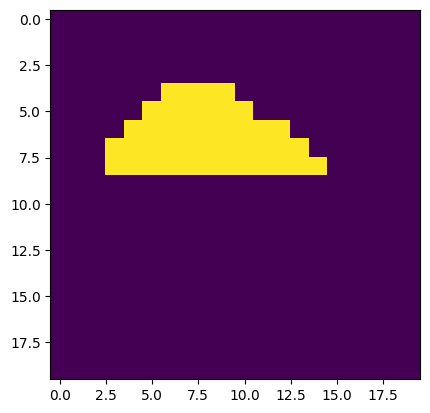

In [2]:
#import triangle_rasterization as tr
import matplotlib.pyplot as plt
import numpy as np


# triangleA = np.array([[4.5, 11], [ 7.5,  9], [7.5, 13]])
# triangleA = np.array([[7.5, 13], [ 2,  13], [4.5, 11]])
# triangleA = np.array([[11, 7], [ 8,  1], [13, 1]])
# triangleA = np.array([[7.5, 13], [ 7.5,  9], [2, 9]])

triangleA = np.array([[7, 3], [ 2,  8], [15, 8]])



pointsA = rasterize_triangle(triangleA)

# triangleB = np.array([[14,8],[5,1],[18, 1]])
# pointsB = rasterize_triangle(triangleB)

# triangleC = np.array([[5,15],[14,15],[14,8]])
# pointsC = rasterize_triangle(triangleC)

array = np.zeros([20,20])

array[pointsA[:,1], pointsA[:,0]] = 1
# array[pointsB[:,1], pointsB[:,0]] = 2
# array[pointsC[:,1], pointsC[:,0]] = 3

plt.imshow(array) #, interpolation='none')
# plt.scatter(*triangleA.T, c='white')
# plt.scatter(*triangleB.T, c='white')
# plt.scatter(*triangleC.T, c='white')

In [ ]:
triB = np.array([[10,15],[5,8],[15,3]])
triB[triB[:, 1].argsort()]

array([[15,  3],
       [ 5,  8],
       [10, 15]])

In [ ]:
# display resolution = 680x720

# cordinate system (continuous): 

# x= -10 to +10
# display_x : 0 to 680
import numpy as np

tri = np.array([[-67,49],[-96,-37],[-94,-33]])
#tri = tri[tri[:, 1].argsort()]


In [ ]:
ydir = -1
tri =np.array( [[10,15],
 [ 5,8], [13,8]])
np.arange(tri[0, 1] + ydir, tri[1, 1], ydir)

array([14, 13, 12, 11, 10,  9])

In [ ]:
tri[(0,1, 2), :]

array([[10, 15],
       [ 5,  8],
       [13,  8]])

In [ ]:
helper_point = np.array([tri[0, 0] + (tri[1, 1] - tri[0, 1]) /
                                         (tri[2, 1] - tri[0, 1]) *
                                         (tri[2, 0] - tri[0, 0]),
                                         tri[1, 1]]).round()

In [ ]:
helper_point

array([-95., -37.])

In [ ]:
 ydir = np.sign(tri[0, 1] - tri[1, 1])

In [ ]:
ydir

-1

In [ ]:
np.arange(200, 800, 100)

array([200, 300, 400, 500, 600, 700])